In [3]:
!pip install img_to_array
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


ERROR: Could not find a version that satisfies the requirement img_to_array (from versions: none)
ERROR: No matching distribution found for img_to_array


In [4]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files
 

train_healthy =r"C:\Users\Deokar\DL_Practicals\Plant\Train\Healthy"
train_powdery =r"C:\Users\Deokar\DL_Practicals\Plant\Train\Powdery"
train_rust = r"C:\Users\Deokar\DL_Practicals\Plant\Train\Rust"

test_healthy =r"C:\Users\Deokar\DL_Practicals\Plant\Test\Healthy"
test_powdery = r"C:\Users\Deokar\DL_Practicals\Plant\Test\Powdery"
test_rust = r"C:\Users\Deokar\DL_Practicals\Plant\Test\Rust"

valid_healthy = r"C:\Users\Deokar\DL_Practicals\Plant\Validation\Healthy"
valid_powdery = r"C:\Users\Deokar\DL_Practicals\Plant\Validation\Powdery"
valid_rust = r"C:\Users\Deokar\DL_Practicals\Plant\Validation\Rust"


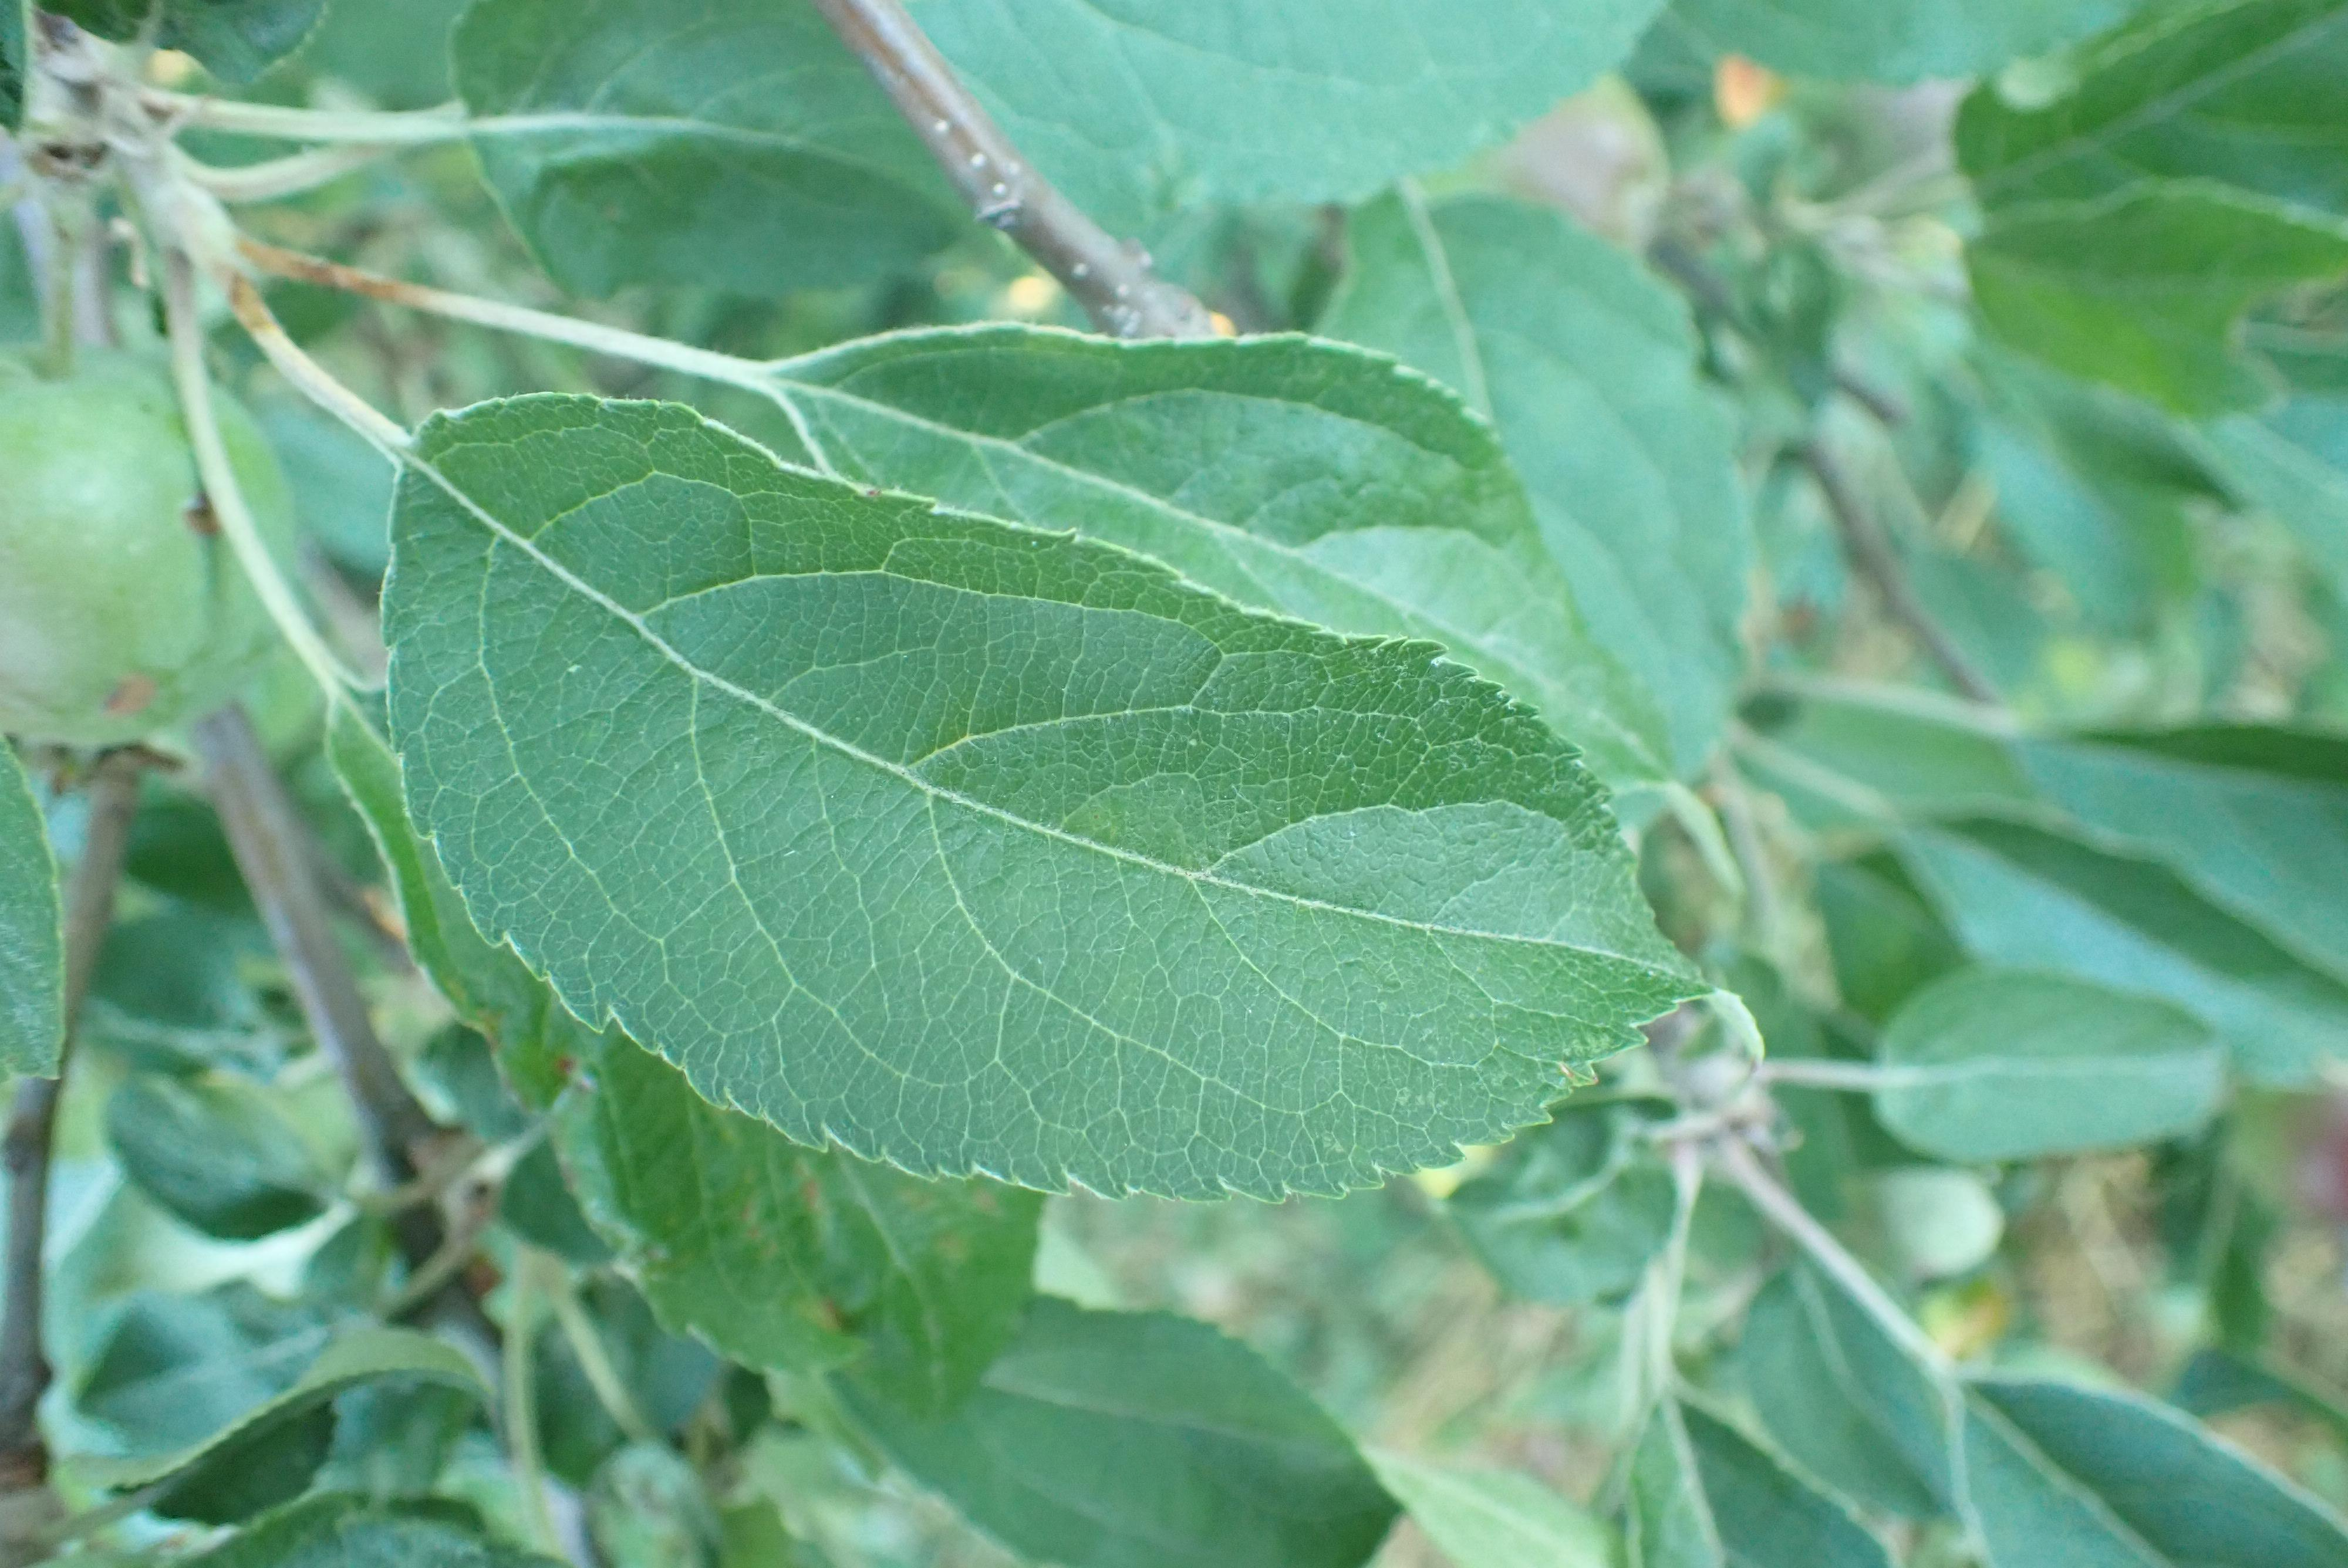

In [5]:
from PIL import Image
import IPython.display as display

image_path =r"C:\Users\Deokar\DL_Practicals\Plant\Train\Healthy\9edc590c03bd8b8b.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\Deokar\DL_Practicals\Plant\Validation",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\Deokar\DL_Practicals\Plant\Train",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 1322 images belonging to 3 classes.


In [7]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(3, activation='softmax'))

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [ ]:
import time
start_time = time.time()
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )
end_time = time.time()

Epoch 1/5
2/2 [==============================] - ETA: 0s - loss: 1.1783 - accuracy: 0.9333

In [12]:
print(f"training time: {end_time - start_time:.2f} seconds")

training time: 698.01 seconds


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\Deokar\DL_Practicals\Plant\Train\Healthy\9edc590c03bd8b8b.jpg")
x


In [14]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 295ms/step


array([7.6153201e-01, 2.3846795e-01, 2.5772906e-08], dtype=float32)

In [15]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [16]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Healthy


In [17]:
model.save(r"C:\Users\Admin\Downloads\working_plant\pant.h5")

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import time
import numpy as np
from tensorflow.keras.models import load_model

# Function to preprocess the image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Function to perform prediction
def predict_image(image_path):
    start_time = time.time()
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    end_time = time.time()
    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()}
    predicted_label = labels[np.argmax(predictions)]
    testing_time = end_time - start_time
    return predicted_label, testing_time

def process_image():
    model=load_model(r"C:\Users\Admin\Downloads\working_plant\pant.h5")
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            predicted_label, testing_time = predict_image(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}\nTesting Time: {testing_time:.2f} seconds")
            display_image(file_path)
        except Exception as e:
            messagebox.showerror("Error", str(e))

# Function to display the image in the GUI
def display_image(image_path):
    image = Image.open(image_path)
    image = image.resize((300, 300), Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image)
    image_label.config(image=photo)
    image_label.image = photo

# Create the GUI
root = tk.Tk()
root.title("Image Classifier")

# Create widgets
select_button = tk.Button(root, text="Select Image", command=process_image)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack()

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Load your model and train_generator here
# model = load_model(...)
# train_generator = ...

root.mainloop()




1/1 [==============================] - 0s 47ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_20984\3747899924.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((300, 300), Image.ANTIALIAS)


1/1 [==============================] - 0s 31ms/step


In [25]:
from PIL import Image
import numpy as np
import time
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Function to preprocess the image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Function to perform prediction
def predict_image(image_path, model):
    start_time = time.time()
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    end_time = time.time()
    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()}
    predicted_label = labels[np.argmax(predictions)]
    testing_time = end_time - start_time
    return predicted_label, testing_time

def process_image(image_path, model):
    try:
        predicted_label, testing_time = predict_image(image_path, model)
        print(f"Predicted Label: {predicted_label}")
        print(f"Testing Time: {testing_time:.2f} seconds")
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    # Load your model and train_generator here
    model = load_model(r"C:\Users\Admin\Downloads\working_plant\pant.h5")
    # train_generator = ...
    
    # Prompt the user to select an image
    file_path = input("Enter the file path of the image: ")
    
    # Process the selected image
    process_image(file_path, model)


Enter the file path of the image: C:\Users\Admin\OneDrive\Pictures\Screenshots\Screenshot 2024-04-15 200627.png
1/1 [==============================] - 0s 125ms/step
Predicted Label: Powdery
Testing Time: 0.20 seconds
